# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [14]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365.0
app_train['EW_YEARS_BIRTH'] = pd.cut(app_train['YEARS_BIRTH'], bins=np.linspace(0, 100, num=11))
app_train['EW_YEARS_BIRTH'].value_counts()

(30.0, 40.0]     82308
(40.0, 50.0]     76541
(50.0, 60.0]     68062
(20.0, 30.0]     45021
(60.0, 70.0]     35579
(90.0, 100.0]        0
(80.0, 90.0]         0
(70.0, 80.0]         0
(10.0, 20.0]         0
(0.0, 10.0]          0
Name: EW_YEARS_BIRTH, dtype: int64

In [15]:
yb_groups = app_train.groupby('EW_YEARS_BIRTH').mean()
yb_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_BIRTH
EW_YEARS_BIRTH,,,,,,,,,,,,,,,,,,,,,
"(0.0, 10.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(10.0, 20.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(20.0, 30.0]",277707.971858,0.114569,0.149086,0.364985,0.610204,0.442638,159520.624754,481889.590091,24722.140244,434452.825591,...,0.000800,0.001999,0.007826,0.007576,0.033719,0.207449,0.261094,1.732856,0.003021,26.622041
"(30.0, 40.0]",278059.960223,0.095835,0.096722,0.407506,0.645964,0.831875,178888.784549,600641.405434,27857.778950,539984.563680,...,0.000583,0.000097,0.006180,0.007372,0.034325,0.283812,0.258744,1.806746,0.006099,35.123197
"(40.0, 50.0]",278478.993886,0.076508,0.092800,0.376230,0.714336,0.447303,180565.509225,657801.241165,28846.606870,589810.998189,...,0.000627,0.000039,0.006418,0.006359,0.033738,0.299873,0.257330,1.880525,0.023817,44.756079
"(50.0, 60.0]",278467.695395,0.061297,0.080324,0.282816,0.744101,0.075079,165128.297171,646874.141614,27558.302292,581687.651923,...,0.000323,0.000029,0.006002,0.007078,0.035186,0.283286,0.271989,1.989409,0.342849,54.976575
"(60.0, 70.0]",277865.895219,0.049214,0.057225,0.184603,0.768740,0.014138,138897.496600,525535.499452,23795.855940,472710.448612,...,0.000056,0.000000,0.005997,0.006710,0.034977,0.197348,0.291582,2.183345,0.831333,63.355933
"(70.0, 80.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(80.0, 90.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'CNT_CHILDREN')

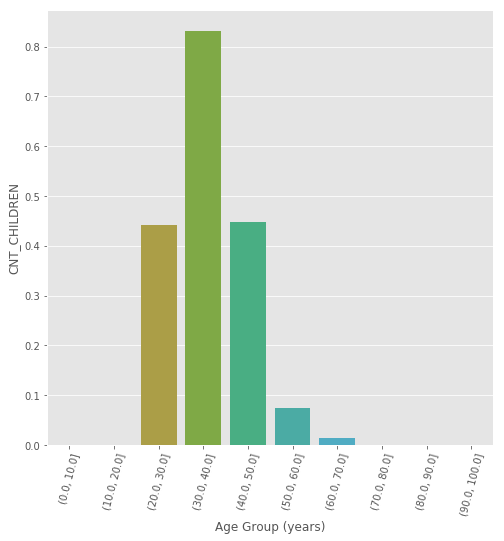

In [16]:
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize = (8, 8))

px = yb_groups.index
py = yb_groups['CNT_CHILDREN']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('CNT_CHILDREN')